In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Carregar dados
titanic = sns.load_dataset('titanic')
print(titanic.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [2]:
# Preencher idade faltante com a mediana
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['fare'] = titanic['fare'].fillna(titanic['fare'].median())

# Eliminar linhas com 'embarked' faltante (apenas 2 registros)
titanic = titanic.dropna(subset=['embarked'])
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic_encoded = pd.get_dummies(titanic, columns=['sex', 'embarked', 'class'], drop_first=True)
titanic_encoded.head()

,survived,pclass,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alive,alone,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,0,3,22.0,1,0,7.2500,man,True,NaN,Southampton,no,False,True,False,True,False,True
1,1,1,38.0,1,0,71.2833,woman,False,C,Cherbourg,yes,False,False,False,False,False,False
2,1,3,26.0,0,0,7.9250,woman,False,NaN,Southampton,yes,True,False,False,True,False,True
3,1,1,35.0,1,0,53.1000,woman,False,C,Southampton,yes,False,False,False,True,False,False
4,0,3,35.0,0,0,8.0500,man,True,NaN,Southampton,no,True,True,False,True,False,True


In [4]:
from sklearn.preprocessing import StandardScaler

features = ['pclass', 'age', 'fare', 'sex_male', 'embarked_Q', 'embarked_S']
X = titanic_encoded[features]
y = titanic_encoded['survived']

# Padronização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [6]:
model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, solver='liblinear')

In [7]:
import numpy as np
# 8. Análise dos coeficientes
coeficientes = pd.DataFrame({
    'Feature': X.columns,
    'Coeficiente': model.coef_[0],
    'Probabilidade': np.exp(model.coef_[0])
})
print("\nAnálise dos Coeficientes:")
print(coeficientes.sort_values('Probabilidade', ascending=False))


Análise dos Coeficientes:
      Feature  Coeficiente  Probabilidade
2        fare    -0.009602       0.990443
4  embarked_Q    -0.102762       0.902342
5  embarked_S    -0.312230       0.731813
1         age    -0.479351       0.619185
0      pclass    -0.914822       0.400588
3    sex_male    -1.229463       0.292449


In [8]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       167
           1       0.69      0.74      0.71       100

    accuracy                           0.78       267
   macro avg       0.76      0.77      0.77       267
weighted avg       0.78      0.78      0.78       267



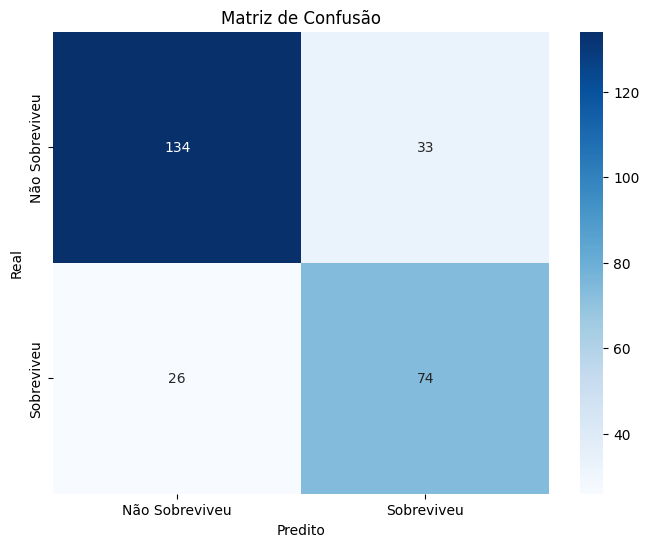

In [9]:
# Matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Sobreviveu', 'Sobreviveu'],
            yticklabels=['Não Sobreviveu', 'Sobreviveu'])
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()